### EOF of SST/APO

In [47]:
sst=anomaly(SST)

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(sst.coords['TLAT'][:,0].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)

eof1[0].plot(figsize=(20,10))

# Plot the leading PC time series.
plt.figure(figsize=(20,10))
pc1[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
plt.xlim()
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()

### Regression fo ENSO Index unto O2 flux

In [39]:
lr= esmtools.stats.linregress(n34,dsc.STF_O2.squeeze().chunk({'time': -1})*mmol_m3_cm_s_mol_m2_yr)
o2_nino=lr.isel(parameter=0).compute()

p_val=lr.isel(parameter=3).compute()

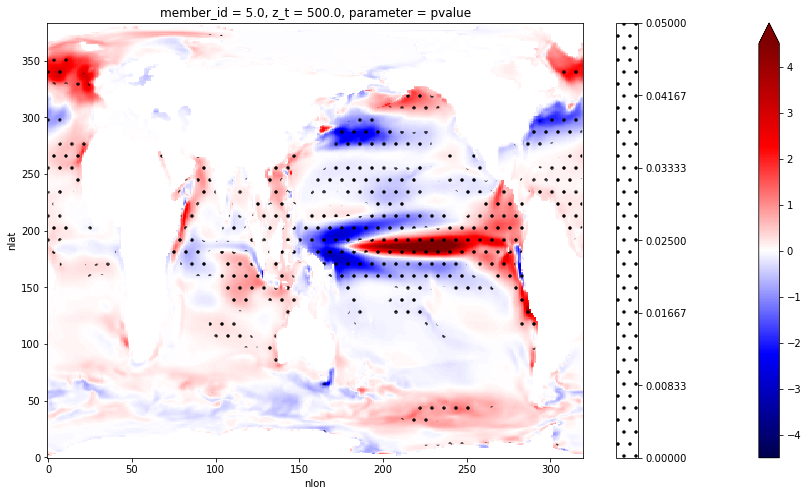

In [49]:
o2_nino.plot(figsize=(15,8),cmap='seismic',robust=True,vmin=-4.5,vmax=4.5)
p_val.where(p_val <= 0.05).plot.contourf(robust=True,vmin=0,vmax=0.05,colors='none',hatches=['.'])